**3. PROCESSAMENTO/TRATAMENTO DE DADOS**

---



In [ ]:
import pandas as pd #biblioteca pandas
import numpy as np #biblioteca numpy
import matplotlib.pyplot as plt #biblioteca matplotlib
%matplotlib inline
import seaborn as sns #biblioteca seaborn

from sklearn.metrics import confusion_matrix, accuracy_score #matriz de confusão
from sklearn.tree import DecisionTreeClassifier #Árvore de Decisão
from sklearn.ensemble import RandomForestClassifier #Floresta randômica
from sklearn.model_selection import GridSearchCV #otimização de parâmetros com validação cruzada
from sklearn.metrics import accuracy_score, classification_report #dados matriz de confusão
from sklearn.preprocessing import StandardScaler #padronização dos dados
from sklearn.model_selection import train_test_split #geração das bases de dados de treinamento e de teste
from sklearn.metrics import ConfusionMatrixDisplay #Matriz de confusão
from sklearn.neural_network import MLPClassifier #redes neurais
from sklearn import neural_network #Redes neurais artificiais
from sklearn.ensemble import AdaBoostClassifier #adaboost
from sklearn import datasets, tree #Árvore de decisão
from sklearn.ensemble import GradientBoostingClassifier #gradient boosting

from scipy.stats import shapiro #teste de hipóteses Shapiro-Wilk
from statsmodels.stats.outliers_influence import variance_inflation_factor #VIF
from imblearn.under_sampling import TomekLinks #técnica de subamostragem
import statsmodels.api as sm #teste de hipóteses ANOVA
from statsmodels.formula.api import ols #teste de hipóteses ANOVA
from statsmodels.stats.multicomp import pairwise_tukeyhsd #teste de hipóteses de Tukey

In [ ]:
#Obter as bases de dados WineQuality: RedWine e WhiteWine

red = pd.read_csv('/content/WineQuality-RedWine.csv')
white = pd.read_csv('/content/WineQuality-WhiteWine.csv')
nomes_port = {'fixed acidity': 'acidez fixa', 'volatile acidity': 'acidez volátil', 'citric acid': 'teor de ácido cítrico', 
                          'residual sugar': 'teor de açúcares residuais', 'chlorides': 'teor de cloretos', 'free sulfur dioxide': 'teor de SO2 livre', 
                          'total sulfur dioxide': 'teor de SO2 total', 'density': 'densidade', 'sulphates': 'teor de sulfatos',
                          'alcohol': 'teor de álcool', 'quality': 'qualidade'}
red = red.rename(columns=nomes_port)
white = white.rename(columns=nomes_port)

print('Dimensões da base de dados dos vinhos tintos: ', red.shape)
print('Dimensões da base de dados dos vinhos brancos: ', white.shape)

Dimensões da base de dados dos vinhos tintos:  (1599, 12)
Dimensões da base de dados dos vinhos brancos:  (4898, 12)


In [ ]:
#Configurando a apresentação dos dataframes

pd.set_option('display.min_rows', 10)
pd.set_option('display.precision', 3)

In [ ]:
#Apresentação de parte do dataframe red

red

In [ ]:
#Apresentação de parte do dataframe white

white

In [ ]:
#União dos dataframes red e white formando o dataframe vinhos

vinhos = pd.concat([red, white], ignore_index=1)
vinhos

In [ ]:
#Verificação de dados faltantes em vinhos

print(vinhos.isnull().sum(), '\n')

In [ ]:
#Verificação de outros tipos de dados

vinhos.select_dtypes(exclude='number')

**ANÁLISE E EXPLORAÇÃO DOS DADOS**

In [ ]:
# Tabela com os dados descritivos dos atributos preditores de vinhos

vinhos.iloc[:, 0:11].describe()

In [ ]:
#Mostrar os boxplots dos atributos preditores de vinhos

fig, bp = plt.subplots(1, 6, figsize=(20, 8))
bp[0].boxplot(vinhos.iloc[:,0]); bp[0].set_title('acidez fixa')
bp[1].boxplot(vinhos.iloc[:,1]); bp[1].set_title('acidez volátil')
bp[2].boxplot(vinhos.iloc[:,2]); bp[2].set_title('teor de ácido cítrico')
bp[3].boxplot(vinhos.iloc[:,3]); bp[3].set_title('teor de açúcar residual')
bp[4].boxplot(vinhos.iloc[:,4]); bp[4].set_title('teor de cloretos')
bp[5].boxplot(vinhos.iloc[:,5]); bp[5].set_title('teor de SO2 livre')

fig, bp2 = plt.subplots(1, 5, figsize=(20, 8))
bp2[0].boxplot(vinhos.iloc[:,6]); bp2[0].set_title('teor de SO2 total')
bp2[1].boxplot(vinhos.iloc[:,7]); bp2[1].set_title('densidade')
bp2[2].boxplot(vinhos.iloc[:,8]); bp2[2].set_title('pH')
bp2[3].boxplot(vinhos.iloc[:,9]); bp2[3].set_title('teor de sulfatos')
bp2[4].boxplot(vinhos.iloc[:,10]); bp2[4].set_title('teor de álcool')

In [ ]:
#Mostrar a matriz de dispersão dos dados dos atributos da base de dados vinhos

sns.pairplot(vinhos.iloc[:,0:11])

In [ ]:
#Exclusão de registros com outliers (matriz de dispersão de pontos)

vinhos.drop(vinhos[vinhos['acidez fixa'] >= 14].index, inplace = True)
vinhos.drop(vinhos[vinhos['acidez fixa'] <= 4.5].index, inplace = True)
vinhos.drop(vinhos[vinhos['acidez volátil'] >= 1.23].index, inplace = True)
vinhos.drop(vinhos[vinhos['teor de ácido cítrico'] >= 0.78].index, inplace=True)
vinhos.drop(vinhos[vinhos['teor de açúcares residuais'] >= 24].index, inplace=True)
vinhos.drop(vinhos[vinhos['teor de cloretos'] >= 0.3].index, inplace=True)
vinhos.drop(vinhos[vinhos['teor de SO2 livre'] >= 125].index, inplace=True)
vinhos.drop(vinhos[vinhos['teor de SO2 total'] >= 280].index, inplace=True)
vinhos.drop(vinhos[vinhos['densidade'] >= 1.007].index, inplace=True)
vinhos.drop(vinhos[vinhos['pH'] >= 3.9].index, inplace=True)
vinhos.drop(vinhos[vinhos['teor de sulfatos'] >= 1.25].index, inplace=True)
vinhos.drop(vinhos[vinhos['teor de álcool'] >= 14.0].index, inplace=True)

vinhos.shape

(6386, 12)

In [ ]:
#Geração de gráficos de dispersão de pontos comparando cada atributo preditor com o atributo classe

fig, gd = plt.subplots(1, 6, figsize=(20, 8))
gd[0].scatter(vinhos['qualidade'], vinhos['acidez fixa'], color='skyblue'); gd[0].set_title('qualid. x acidez fixa')
gd[1].scatter(vinhos['qualidade'], vinhos['acidez volátil'], color='skyblue'); gd[1].set_title('qualid. x acidez volátil')
gd[2].scatter(vinhos['qualidade'], vinhos['teor de ácido cítrico'], color='skyblue'); gd[2].set_title('qualid. x teor ácido cítrico')
gd[3].scatter(vinhos['qualidade'], vinhos['teor de açúcares residuais'], color='skyblue'); gd[3].set_title('qualid. x teor açúcares residuais')
gd[4].scatter(vinhos['qualidade'], vinhos['teor de cloretos'], color='skyblue'); gd[4].set_title('qualid. x teor cloretos')
gd[5].scatter(vinhos['qualidade'], vinhos['teor de SO2 livre'], color='skyblue'); gd[5].set_title('qualid. x teor de SO2 livre')

fig, gd2 = plt.subplots(1, 5, figsize=(20, 8))
gd2[0].scatter(vinhos['qualidade'], vinhos['teor de SO2 total'], color='skyblue'); gd2[0].set_title('qualid. x teor de SO2 total')
gd2[1].scatter(vinhos['qualidade'], vinhos['densidade'], color='skyblue'); gd2[1].set_title('qualid. x densidade')
gd2[2].scatter(vinhos['qualidade'], vinhos['pH'], color='skyblue'); gd2[2].set_title('qualid. x pH')
gd2[3].scatter(vinhos['qualidade'], vinhos['teor de sulfatos'], color='skyblue'); gd2[3].set_title('qualid. x teor sulfatos')
gd2[4].scatter(vinhos['qualidade'], vinhos['teor de álcool'], color='skyblue'); gd2[4].set_title('qualid. x teor de álcool')

In [ ]:
# Matriz de correlação de Pearson

plt.figure(figsize=(12, 6))
plot = sns.heatmap(vinhos.iloc[:,0:11].corr(), annot=True)
plot

In [ ]:
# Avaliação da multicolinearidade

nc = []
for i in range(11):
  nc.append(variance_inflation_factor(vinhos.iloc[:,0:11].values, i))

multic = pd.DataFrame(zip(vinhos.iloc[:,0:11].columns, nc), columns=['Atributos preditores', 'VIF'])
print(multic, '\n')

In [ ]:
#Dividir a base de dados vinhos em atributos preditores e atributo classe

X_vinhos = vinhos.iloc[:, 0:11].values
y_vinhos = vinhos.iloc[:, 11].values
print('A base de dados preditora tem as seguintes dimensões: ', X_vinhos.shape)
print('A base de dados de teste tem as seguintes dimensões: ', y_vinhos.shape)

A base de dados preditora tem as seguintes dimensões:  (6386, 11)
A base de dados de teste tem as seguintes dimensões:  (6386,)


In [ ]:
#Padronização dos dados de X_vinhos

pad = StandardScaler()
X_vinhos_p = pad.fit_transform(X_vinhos)
X_vinhos_p

array([[ 0.15761044,  2.23162865, -2.2754388 , ...,  1.84039329,
         0.23994075, -0.92217102],
       [ 0.47747706,  3.34051413, -2.2754388 , ..., -0.1179459 ,
         1.11685509, -0.58284023],
       [ 0.47747706,  2.60125715, -1.98730348, ...,  0.26108749,
         0.8976265 , -0.58284023],
       ...,
       [-0.56208944, -0.6021898 , -0.90679604, ..., -1.44456277,
        -0.49082119, -0.92217102],
       [-1.36175597, -0.29416605, -0.11442392, ...,  0.76646535,
        -1.07543075,  1.96214074],
       [-0.96192271, -0.78700404,  0.46184671, ...,  0.26108749,
        -1.51388792,  1.11381375]])

In [ ]:
#Comprovação da padronização dos dados da base de dados X_vinhos

print((np.mean(X_vinhos_p, axis=0)), '\n')
print(np.std(X_vinhos_p, axis=0))

In [ ]:
#Verificar a frequência das categorias do atributo classe

print(np.unique(y_vinhos, return_counts=True))

(array([3, 4, 5, 6, 7, 8, 9]), array([  25,  212, 2097, 2794, 1065,  188,    5]))


In [ ]:
#Gráfico de barras dos valores do atributo classe

y_vinhos_df = pd.DataFrame(y_vinhos)
sns.catplot(x = 0, kind = 'count', data = y_vinhos_df, palette='Oranges')
plt.ylabel("Frequência")
plt.xlabel("Categorias")

In [ ]:
#Distribuir os dados do atributo classe em novas categorias

for i in range(len(y_vinhos)):
  if y_vinhos[i] <= 6:
    y_vinhos[i] = 1
  if y_vinhos[i] > 6:
    y_vinhos[i] = 2
  
print(np.unique(y_vinhos, return_counts=True))

(array([1, 2]), array([5128, 1258]))


Text(0.5, 6.79999999999999, 'Categoria')

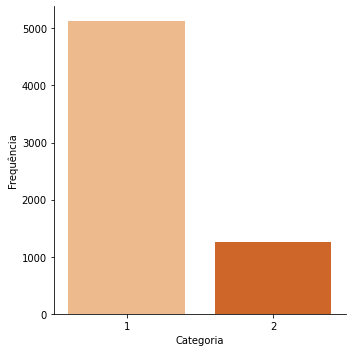

In [ ]:
#Gráfico de barras dos valores do atributo classe após a formação das novas categorias

y_vinhos_df2 = pd.DataFrame(y_vinhos)
sns.catplot(x = 0, kind = 'count', data = y_vinhos_df2, palette='Oranges')
plt.ylabel("Frequência")
plt.xlabel("Categoria")

In [ ]:
#Subamostragem TomekLinks

tl = TomekLinks(sampling_strategy='majority')
X_vinhos_p_sub, y_vinhos_sub = tl.fit_resample(X_vinhos_p, y_vinhos)
print(X_vinhos_p_sub.shape, y_vinhos_sub.shape)
print(np.unique(y_vinhos_sub, return_counts=True))

(6239, 11) (6239,)
(array([1, 2]), array([4981, 1258]))


In [ ]:
#Apresentar o gráfico de coordenadas paralelas

X_df = pd.DataFrame(X_vinhos_p_sub)
y_df = pd.DataFrame(y_vinhos_sub)
vinhos_par = pd.concat([X_df, y_df], axis = 1) 

vinhos_par.columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']

ax3 = pd.plotting.parallel_coordinates(vinhos_par, '11', color=('SteelBlue', 'Yellow', 'Chocolate'))

**CRIAÇÃO DE MODELOS DE MACHINE LEARNING**

In [ ]:
# Criação da base de dados de treinamento e de teste

X_train, X_test, y_train, y_test = train_test_split(X_vinhos_p_sub, y_vinhos_sub, test_size = 0.30, random_state = 10)
print('As dimensões da base de dados de treinamento (atributos preditores) são: ', X_train.shape)
print('As dimensões da base de dados de teste (atributos preditores) são: ', X_test.shape)
print('As dimensões da base de dados de treinamento (atributo classe) são: ', y_train.shape)
print('As dimensões da base de dados de teste (atributo classe) são: ', y_test.shape)

As dimensões da base de dados de treinamento (atributos preditores) são:  (4367, 11)
As dimensões da base de dados de teste (atributos preditores) são:  (1872, 11)
As dimensões da base de dados de treinamento (atributo classe) são:  (4367,)
As dimensões da base de dados de teste (atributo classe) são:  (1872,)


In [ ]:
#GridSearchCV - Árvore de Decisão

param_dict = {'criterion': ['gini', 'entropy'], 
              'max_depth': range(1, 10),
              'min_samples_split': range(1, 10),
              'min_samples_leaf': range(1, 5)}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid=param_dict, cv = 10, verbose = 1, n_jobs = -1)
grid.fit(X_train, y_train)

print('\n', '\n', 'Os melhores parâmetros são ', grid.best_params_)
print('A acurária é igual a ', grid.best_score_, '\n', '\n')

In [ ]:
#Cálculo das métricas do modelo de árvore de decisão

ac_trein = []
ac_prev = []
prec_cat1 = []
prec_cat2 = []
rec_cat1 = []
rec_cat2 = []
f1_cat1 = []
f1_cat2 = []

for i in range(0,100):
  X_train, X_test, y_train, y_test = train_test_split(X_vinhos_p_sub, y_vinhos_sub, test_size = 0.30)
  arv_dec = DecisionTreeClassifier(criterion = 'gini', max_depth = 9, min_samples_leaf = 1, min_samples_split = 2)
  arv_dec = arv_dec.fit(X_train, y_train)
  y_pred = arv_dec.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  ac_trein.append(arv_dec.score(X_train, y_train))
  ac_prev.append(accuracy_score(y_test, y_pred))
  prec_cat1.append(cm[0, 0]/(cm[0, 0] + cm[1, 0]))
  prec_cat2.append(cm[1, 1]/(cm[1, 1] + cm[0, 1]))
  rec_cat1.append(cm[0, 0]/(cm[0, 0] + cm[0, 1]))
  rec_cat2.append(cm[1, 1]/(cm[1, 1] + cm[1, 0]))
  f1_cat1.append(2*((cm[0, 0]/(cm[0, 0] + cm[1, 0])) * (cm[0, 0]/(cm[0, 0] + cm[0, 1])))/
                 ((cm[0, 0]/(cm[0, 0] + cm[1, 0])) + (cm[0, 0]/(cm[0, 0] + cm[0, 1]))))
  f1_cat2.append(2*((cm[1, 1]/(cm[1, 1] + cm[0, 1])) * (cm[1, 1]/(cm[1, 1] + cm[1, 0])))/
                 ((cm[1, 1]/(cm[1, 1] + cm[0, 1])) + (cm[1, 1]/(cm[1, 1] + cm[1, 0]))))

print('Acurácia de treinamento:', round(np.mean(ac_trein), 3), '+/-', round(np.std(ac_trein), 3))
print('Acurácia de previsão:', round(np.mean(ac_prev), 3), '+/-', round(np.std(ac_prev), 3))
print('Precisão da categoria 1:', round(np.mean(prec_cat1), 3), '+/-', round(np.std(prec_cat1), 3))
print('Precisão da categoria 2:', round(np.mean(prec_cat2), 3), '+/-', round(np.std(prec_cat2), 3))
print('Recall da categoria 1:', round(np.mean(rec_cat1), 3), '+/-', round(np.std(rec_cat1), 3))
print('Recall da categoria 2:', round(np.mean(rec_cat2), 3), '+/-', round(np.std(rec_cat2), 3))
print('f1-score da categoria 1:', round(np.mean(f1_cat1), 3), '+/-', round(np.std(f1_cat1), 3))
print('f1-score da categoria 2:', round(np.mean(f1_cat2), 3), '+/-', round(np.std(f1_cat2), 3))

ac_prev_arv = np.copy(ac_prev)
prec_cat1_arv = np.copy(prec_cat1)
prec_cat2_arv = np.copy(prec_cat2)
rec_cat1_arv = np.copy(rec_cat1)
rec_cat2_arv = np.copy(rec_cat2)
f1_cat1_arv = np.copy(f1_cat1)
f1_cat2_arv = np.copy(f1_cat2)

In [ ]:
#Histogramas - árvore de decisão

print('Histogramas das métricas do modelo de árvore de decisão:', '\n')
fig, hi = plt.subplots(1, 4, figsize=(20, 8))
hi[0].hist(x=ac_prev_arv, bins='auto', color='lightblue', alpha=0.9, rwidth=0.85); hi[0].set_title('acurácia de previsão')
hi[1].hist(x=prec_cat1_arv, bins='auto', color='lightblue', alpha=0.9, rwidth=0.85); hi[1].set_title('precisão categoria 1')
hi[2].hist(x=prec_cat2_arv, bins='auto', color='lightblue', alpha=0.9, rwidth=0.85); hi[2].set_title('precisão categoria 2')
hi[3].hist(x=rec_cat1_arv, bins='auto', color='lightblue', alpha=0.9, rwidth=0.85); hi[3].set_title('recall categoria 1')

fig, hi2 = plt.subplots(1, 3, figsize=(20, 8))
hi2[0].hist(x=rec_cat2_arv, bins='auto', color='lightblue', alpha=0.9, rwidth=0.85); hi2[0].set_title('recall categoria 2')
hi2[1].hist(x=f1_cat1_arv, bins='auto', color='lightblue', alpha=0.9, rwidth=0.85); hi2[1].set_title('f1-score categoria 1')
hi2[2].hist(x=f1_cat2_arv, bins='auto', color='lightblue', alpha=0.9, rwidth=0.85); hi2[2].set_title('f1-score categoria 2')

In [ ]:
#Aplicação do teste de Shapiro-Wilk - modelo de árvore de decisão

#from scipy.stats import shapiro

stat1, p1 = shapiro(ac_prev_arv)
stat2, p2 = shapiro(prec_cat1_arv)
stat3, p3 = shapiro(prec_cat2_arv)
stat4, p4 = shapiro(rec_cat1_arv)
stat5, p5 = shapiro(rec_cat2_arv)
stat6, p6 = shapiro(f1_cat1_arv)
stat7, p7 = shapiro(f1_cat2_arv)

print('Métrica, estatística teste do teste de Shapiro-Wilk (alfa = 0,05) e valor p:', '\n')
print('Acurácia de previsão:', round(stat1, 3), round(p1, 3))
print('Precisão categoria 1:', round(stat2, 3), round(p2, 3))
print('Precisão categoria 1:', round(stat3, 3), round(p3, 3))
print('Recall categoria 1:', round(stat4, 3), round(p4, 3))
print('Recall categoria 2:', round(stat5, 3), round(p5, 3))
print('f1-score categoria 1:', round(stat6, 3), round(p6, 3))
print('f1-score categoria 2:', round(stat7, 3), round(p7, 3))

In [ ]:
#GridSearchCV - Floresta randômica

hiperpar = {'criterion': ['gini', 'entropy'], 
            'n_estimators': [150, 250, 350],
            'min_samples_split': range(1, 5), 
            'min_samples_leaf': range(1, 5)}

G = GridSearchCV(estimator=RandomForestClassifier(), param_grid=hiperpar, cv = 10, verbose = 1, n_jobs = -1)
G.fit(X_train, y_train)

print('Os melhores parâmetros são', G.best_params_)
print('O score de acurácia de treinamento é', G.best_score_)

In [ ]:
#Algoritmo de Floresta Randômica

#Cálculo das métricas do modelo de floresta randômica
ac_trein = []
ac_prev = []
prec_cat1 = []
prec_cat2 = []
rec_cat1 = []
rec_cat2 = []
f1_cat1 = []
f1_cat2 = []

for i in range(0,100):
  X_train, X_test, y_train, y_test = train_test_split(X_vinhos_p_sub, y_vinhos_sub, test_size = 0.30)
  RF = RandomForestClassifier(n_estimators=150, criterion = 'entropy', random_state=3, min_samples_leaf = 1, min_samples_split = 2)
  RF.fit(X_train, y_train)
  y_pred = RF.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  ac_trein.append(RF.score(X_train, y_train))
  ac_prev.append(accuracy_score(y_test, y_pred))
  prec_cat1.append(cm[0, 0]/(cm[0, 0] + cm[1, 0]))
  prec_cat2.append(cm[1, 1]/(cm[1, 1] + cm[0, 1]))
  rec_cat1.append(cm[0, 0]/(cm[0, 0] + cm[0, 1]))
  rec_cat2.append(cm[1, 1]/(cm[1, 1] + cm[1, 0]))
  f1_cat1.append(2*((cm[0, 0]/(cm[0, 0] + cm[1, 0])) * (cm[0, 0]/(cm[0, 0] + cm[0, 1])))/
                 ((cm[0, 0]/(cm[0, 0] + cm[1, 0])) + (cm[0, 0]/(cm[0, 0] + cm[0, 1]))))
  f1_cat2.append(2*((cm[1, 1]/(cm[1, 1] + cm[0, 1])) * (cm[1, 1]/(cm[1, 1] + cm[1, 0])))/
                 ((cm[1, 1]/(cm[1, 1] + cm[0, 1])) + (cm[1, 1]/(cm[1, 1] + cm[1, 0]))))

print('Acurácia de treinamento:', round(np.mean(ac_trein), 3), '+/-', round(np.std(ac_trein), 3))
print('Acurácia de previsão:', round(np.mean(ac_prev), 3), '+/-', round(np.std(ac_prev), 3))
print('Precisão da categoria 1:', round(np.mean(prec_cat1), 3), '+/-', round(np.std(prec_cat1), 3))
print('Precisão da categoria 2:', round(np.mean(prec_cat2), 3), '+/-', round(np.std(prec_cat2), 3))
print('Recall da categoria 1:', round(np.mean(rec_cat1), 3), '+/-', round(np.std(rec_cat1), 3))
print('Recall da categoria 2:', round(np.mean(rec_cat2), 3), '+/-', round(np.std(rec_cat2), 3))
print('f1-score da categoria 1:', round(np.mean(f1_cat1), 3), '+/-', round(np.std(f1_cat1), 3))
print('f1-score da categoria 2:', round(np.mean(f1_cat2), 3), '+/-', round(np.std(f1_cat2), 3))

ac_prev_RF = np.copy(ac_prev)
prec_cat1_RF = np.copy(prec_cat1)
prec_cat2_RF = np.copy(prec_cat2)
rec_cat1_RF = np.copy(rec_cat1)
rec_cat2_RF = np.copy(rec_cat2)
f1_cat1_RF = np.copy(f1_cat1)
f1_cat2_RF = np.copy(f1_cat2)

In [ ]:
#Histogramas - Floresta randômica

print('Histogramas das métricas do modelo de floresta randômica:', '\n')
fig, hi = plt.subplots(1, 4, figsize=(20, 8))
hi[0].hist(x=ac_prev_RF, bins='auto', color='lightblue', alpha=0.9, rwidth=0.85); hi[0].set_title('acurácia de previsão')
hi[1].hist(x=prec_cat1_RF, bins='auto', color='lightblue', alpha=0.9, rwidth=0.85); hi[1].set_title('precisão categoria 1')
hi[2].hist(x=prec_cat2_RF, bins='auto', color='lightblue', alpha=0.9, rwidth=0.85); hi[2].set_title('precisão categoria 2')
hi[3].hist(x=rec_cat1_RF, bins='auto', color='lightblue', alpha=0.9, rwidth=0.85); hi[3].set_title('recall categoria 1')

fig, hi2 = plt.subplots(1, 3, figsize=(20, 8))
hi2[0].hist(x=rec_cat2_RF, bins='auto', color='lightblue', alpha=0.9, rwidth=0.85); hi2[0].set_title('recall categoria 2')
hi2[1].hist(x=f1_cat1_RF, bins='auto', color='lightblue', alpha=0.9, rwidth=0.85); hi2[1].set_title('f1-score categoria 1')
hi2[2].hist(x=f1_cat2_RF, bins='auto', color='lightblue', alpha=0.9, rwidth=0.85); hi2[2].set_title('f1-score categoria 2')

In [ ]:
#Aplicação do teste de Shapiro-Wilk - modelo de floresta randômica

stat1, p1 = shapiro(ac_prev_RF)
stat2, p2 = shapiro(prec_cat1_RF)
stat3, p3 = shapiro(prec_cat2_RF)
stat4, p4 = shapiro(rec_cat1_RF)
stat5, p5 = shapiro(rec_cat2_RF)
stat6, p6 = shapiro(f1_cat1_RF)
stat7, p7 = shapiro(f1_cat2_RF)

print('Métrica, estatística teste do teste de Shapiro-Wilk (alfa = 0,05) e valor p:', '\n')
print('Acurácia de previsão:', round(stat1, 3), round(p1, 3))
print('Precisão categoria 1:', round(stat2, 3), round(p2, 3))
print('Precisão categoria 1:', round(stat3, 3), round(p3, 3))
print('Recall categoria 1:', round(stat4, 3), round(p4, 3))
print('Recall categoria 2:', round(stat5, 3), round(p5, 3))
print('f1-score categoria 1:', round(stat6, 3), round(p6, 3))
print('f1-score categoria 2:', round(stat7, 3), round(p7, 3))

In [ ]:
#GridSearchCV - Redes Neurais Artificiais

param = {'max_iter': [10000], 
            'hidden_layer_sizes': [(110, 110), (300)],
            'activation': ['relu', 'logistic', 'tanh'],
            'solver': ['adam', 'sgd']}

G = GridSearchCV(neural_network.MLPClassifier(random_state=8), param_grid=param, cv = 10, verbose = 1, n_jobs = -1)
y_prev = G.fit(X_train, y_train).predict(X_test)

print('\nOs melhores parâmetros são', G.best_params_)
print('O score de acurácia de treinamento é', G.best_score_, '\n')

In [ ]:
#Algoritmo de Redes Neurais Artificiais

#Cálculo das métricas do modelo de redes neurais artificiais
ac_trein = []
ac_prev = []
prec_cat1 = []
prec_cat2 = []
rec_cat1 = []
rec_cat2 = []
f1_cat1 = []
f1_cat2 = []

for i in range(0, 100):
  X_train, X_test, y_train, y_test = train_test_split(X_vinhos_p_sub, y_vinhos_sub, test_size = 0.30)
  RN = MLPClassifier(activation = 'relu', max_iter = 10000, hidden_layer_sizes= (110, 110), solver = 'adam', random_state=7)
  RN.fit(X_train, y_train)
  y_pred = RN.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  ac_trein.append(RN.score(X_train, y_train))
  ac_prev.append(accuracy_score(y_test, y_pred))
  prec_cat1.append(cm[0, 0]/(cm[0, 0] + cm[1, 0]))
  prec_cat2.append(cm[1, 1]/(cm[1, 1] + cm[0, 1]))
  rec_cat1.append(cm[0, 0]/(cm[0, 0] + cm[0, 1]))
  rec_cat2.append(cm[1, 1]/(cm[1, 1] + cm[1, 0]))
  f1_cat1.append(2*((cm[0, 0]/(cm[0, 0] + cm[1, 0])) * (cm[0, 0]/(cm[0, 0] + cm[0, 1])))/
                 ((cm[0, 0]/(cm[0, 0] + cm[1, 0])) + (cm[0, 0]/(cm[0, 0] + cm[0, 1]))))
  f1_cat2.append(2*((cm[1, 1]/(cm[1, 1] + cm[0, 1])) * (cm[1, 1]/(cm[1, 1] + cm[1, 0])))/
                 ((cm[1, 1]/(cm[1, 1] + cm[0, 1])) + (cm[1, 1]/(cm[1, 1] + cm[1, 0]))))

print('Acurácia de treinamento:', round(np.mean(ac_trein), 3), '+/-', round(np.std(ac_trein), 3))
print('Acurácia de previsão:', round(np.mean(ac_prev), 3), '+/-', round(np.std(ac_prev), 3))
print('Precisão da categoria 1:', round(np.mean(prec_cat1), 3), '+/-', round(np.std(prec_cat1), 3))
print('Precisão da categoria 2:', round(np.mean(prec_cat2), 3), '+/-', round(np.std(prec_cat2), 3))
print('Recall da categoria 1:', round(np.mean(rec_cat1), 3), '+/-', round(np.std(rec_cat1), 3))
print('Recall da categoria 2:', round(np.mean(rec_cat2), 3), '+/-', round(np.std(rec_cat2), 3))
print('f1-score da categoria 1:', round(np.mean(f1_cat1), 3), '+/-', round(np.std(f1_cat1), 3))
print('f1-score da categoria 2:', round(np.mean(f1_cat2), 3), '+/-', round(np.std(f1_cat2), 3))

ac_prev_RN = np.copy(ac_prev)
prec_cat1_RN = np.copy(prec_cat1)
prec_cat2_RN = np.copy(prec_cat2)
rec_cat1_RN = np.copy(rec_cat1)
rec_cat2_RN = np.copy(rec_cat2)
f1_cat1_RN = np.copy(f1_cat1)
f1_cat2_RN = np.copy(f1_cat2)

In [ ]:
#Histogramas - Redes Neurais Artificiais

print('Histogramas das métricas do modelo de redes neurais artificiais:', '\n')
fig, hi = plt.subplots(1, 4, figsize=(20, 8))
hi[0].hist(x=ac_prev_RN, bins='auto', color='lightblue', alpha=0.9, rwidth=0.85); hi[0].set_title('acurácia de previsão')
hi[1].hist(x=prec_cat1_RN, bins='auto', color='lightblue', alpha=0.9, rwidth=0.85); hi[1].set_title('precisão categoria 1')
hi[2].hist(x=prec_cat2_RN, bins='auto', color='lightblue', alpha=0.9, rwidth=0.85); hi[2].set_title('precisão categoria 2')
hi[3].hist(x=rec_cat1_RN, bins='auto', color='lightblue', alpha=0.9, rwidth=0.85); hi[3].set_title('recall categoria 1')

fig, hi2 = plt.subplots(1, 3, figsize=(20, 8))
hi2[0].hist(x=rec_cat2_RN, bins='auto', color='lightblue', alpha=0.9, rwidth=0.85); hi2[0].set_title('recall categoria 2')
hi2[1].hist(x=f1_cat1_RN, bins='auto', color='lightblue', alpha=0.9, rwidth=0.85); hi2[1].set_title('f1-score categoria 1')
hi2[2].hist(x=f1_cat2_RN, bins='auto', color='lightblue', alpha=0.9, rwidth=0.85); hi2[2].set_title('f1-score categoria 2')

In [ ]:
#Aplicação do teste de Shapiro-Wilk - modelo de redes neurais artificiais

from scipy.stats import shapiro

stat1, p1 = shapiro(ac_prev_RN)
stat2, p2 = shapiro(prec_cat1_RN)
stat3, p3 = shapiro(prec_cat2_RN)
stat4, p4 = shapiro(rec_cat1_RN)
stat5, p5 = shapiro(rec_cat2_RN)
stat6, p6 = shapiro(f1_cat1_RN)
stat7, p7 = shapiro(f1_cat2_RN)

print('Métrica, estatística teste do teste de Shapiro-Wilk (alfa = 0,05) e valor p:', '\n')
print('Acurácia de previsão:', round(stat1, 3), round(p1, 3))
print('Precisão categoria 1:', round(stat2, 3), round(p2, 3))
print('Precisão categoria 1:', round(stat3, 3), round(p3, 3))
print('Recall categoria 1:', round(stat4, 3), round(p4, 3))
print('Recall categoria 2:', round(stat5, 3), round(p5, 3))
print('f1-score categoria 1:', round(stat6, 3), round(p6, 3))
print('f1-score categoria 2:', round(stat7, 3), round(p7, 3))

In [ ]:
#GridSearchCV - adaboost

abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

param = {'base_estimator__max_depth': [10, 20],
              'base_estimator__min_samples_leaf': [3, 5],
              'n_estimators': [350, 450],
              'learning_rate': [0.01, 0.1]}

classif = GridSearchCV(abc, param, verbose=1, n_jobs=-1, cv = 10)
classif.fit(X_train,y_train)
y_prev = classif.fit(X_train, y_train).predict(X_test)

print('\nOs melhores parâmetros são', classif.best_params_)
print('O score de acurácia de treinamento é', classif.best_score_, '\n')

In [ ]:
#Gerando o classificador adaboost

#Cálculo das métricas do adaboost
ac_trein = []
ac_prev = []
prec_cat1 = []
prec_cat2 = []
rec_cat1 = []
rec_cat2 = []
f1_cat1 = []
f1_cat2 = []

for i in range(0,100):
  X_train, X_test, y_train, y_test = train_test_split(X_vinhos_p_sub, y_vinhos_sub, test_size = 0.30)
  classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=20, min_samples_leaf=5), n_estimators=450, learning_rate=0.1)
  model = classifier.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  ac_trein.append(classifier.score(X_train, y_train))
  ac_prev.append(accuracy_score(y_test, y_pred))
  prec_cat1.append(cm[0, 0]/(cm[0, 0] + cm[1, 0]))
  prec_cat2.append(cm[1, 1]/(cm[1, 1] + cm[0, 1]))
  rec_cat1.append(cm[0, 0]/(cm[0, 0] + cm[0, 1]))
  rec_cat2.append(cm[1, 1]/(cm[1, 1] + cm[1, 0]))
  f1_cat1.append(2*((cm[0, 0]/(cm[0, 0] + cm[1, 0])) * (cm[0, 0]/(cm[0, 0] + cm[0, 1])))/
                 ((cm[0, 0]/(cm[0, 0] + cm[1, 0])) + (cm[0, 0]/(cm[0, 0] + cm[0, 1]))))
  f1_cat2.append(2*((cm[1, 1]/(cm[1, 1] + cm[0, 1])) * (cm[1, 1]/(cm[1, 1] + cm[1, 0])))/
                 ((cm[1, 1]/(cm[1, 1] + cm[0, 1])) + (cm[1, 1]/(cm[1, 1] + cm[1, 0]))))

print('Acurácia de treinamento:', round(np.mean(ac_trein), 3), '+/-', round(np.std(ac_trein), 3))
print('Acurácia de previsão:', round(np.mean(ac_prev), 3), '+/-', round(np.std(ac_prev), 3))
print('Precisão da categoria 1:', round(np.mean(prec_cat1), 3), '+/-', round(np.std(prec_cat1), 3))
print('Precisão da categoria 2:', round(np.mean(prec_cat2), 3), '+/-', round(np.std(prec_cat2), 3))
print('Recall da categoria 1:', round(np.mean(rec_cat1), 3), '+/-', round(np.std(rec_cat1), 3))
print('Recall da categoria 2:', round(np.mean(rec_cat2), 3), '+/-', round(np.std(rec_cat2), 3))
print('f1-score da categoria 1:', round(np.mean(f1_cat1), 3), '+/-', round(np.std(f1_cat1), 3))
print('f1-score da categoria 2:', round(np.mean(f1_cat2), 3), '+/-', round(np.std(f1_cat2), 3))

ac_prev_ada = np.copy(ac_prev)
prec_cat1_ada = np.copy(prec_cat1)
prec_cat2_ada = np.copy(prec_cat2)
rec_cat1_ada = np.copy(rec_cat1)
rec_cat2_ada = np.copy(rec_cat2)
f1_cat1_ada = np.copy(f1_cat1)
f1_cat2_ada = np.copy(f1_cat2)

In [ ]:
#Histogramas - adaboost

print('Histogramas das métricas do modelo de adaboost:', '\n')
fig, hi = plt.subplots(1, 4, figsize=(20, 8))
hi[0].hist(x=ac_prev_ada, bins='auto', color='lightblue', alpha=0.9, rwidth=0.85); hi[0].set_title('acurácia de previsão')
hi[1].hist(x=prec_cat1_ada, bins='auto', color='lightblue', alpha=0.9, rwidth=0.85); hi[1].set_title('precisão categoria 1')
hi[2].hist(x=prec_cat2_ada, bins='auto', color='lightblue', alpha=0.9, rwidth=0.85); hi[2].set_title('precisão categoria 2')
hi[3].hist(x=rec_cat1_ada, bins='auto', color='lightblue', alpha=0.9, rwidth=0.85); hi[3].set_title('recall categoria 1')

fig, hi2 = plt.subplots(1, 3, figsize=(20, 8))
hi2[0].hist(x=rec_cat2_ada, bins='auto', color='lightblue', alpha=0.9, rwidth=0.85); hi2[0].set_title('recall categoria 2')
hi2[1].hist(x=f1_cat1_ada, bins='auto', color='lightblue', alpha=0.9, rwidth=0.85); hi2[1].set_title('f1-score categoria 1')
hi2[2].hist(x=f1_cat2_ada, bins='auto', color='lightblue', alpha=0.9, rwidth=0.85); hi2[2].set_title('f1-score categoria 2')

In [ ]:
#Aplicação do teste de Shapiro-Wilk - modelo adaboost

from scipy.stats import shapiro

stat1, p1 = shapiro(ac_prev_ada)
stat2, p2 = shapiro(prec_cat1_ada)
stat3, p3 = shapiro(prec_cat2_ada)
stat4, p4 = shapiro(rec_cat1_ada)
stat5, p5 = shapiro(rec_cat2_ada)
stat6, p6 = shapiro(f1_cat1_ada)
stat7, p7 = shapiro(f1_cat2_ada)

print('Métrica, estatística teste do teste de Shapiro-Wilk (alfa = 0,05) e valor p:', '\n')
print('Acurácia de previsão:', round(stat1, 3), round(p1, 3))
print('Precisão categoria 1:', round(stat2, 3), round(p2, 3))
print('Precisão categoria 1:', round(stat3, 3), round(p3, 3))
print('Recall categoria 1:', round(stat4, 3), round(p4, 3))
print('Recall categoria 2:', round(stat5, 3), round(p5, 3))
print('f1-score categoria 1:', round(stat6, 3), round(p6, 3))
print('f1-score categoria 2:', round(stat7, 3), round(p7, 3))

In [ ]:
#GridSearchCV - gradient boosting

gbo = GradientBoostingClassifier()

param2 = {'max_features': [7, 10], 'max_depth': [10, 13],
          'n_estimators': [150, 200],
          'learning_rate': [0.3, 0.4], 
          'min_samples_leaf': [6, 8]}

classif2 = GridSearchCV(gbo, param2, verbose=1, n_jobs=-1, cv = 10)
classif2.fit(X_train,y_train)
y_prev = classif2.fit(X_train, y_train).predict(X_test)

print('\nOs melhores parâmetros são', classif2.best_params_)
print('O score de acurácia de treinamento é', classif2.best_score_, '\n')

In [ ]:
# Geração do classificador gradient boosting

#Cálculo das métricas do gradiente boosting
ac_trein = []
ac_prev = []
prec_cat1 = []
prec_cat2 = []
rec_cat1 = []
rec_cat2 = []
f1_cat1 = []
f1_cat2 = []

for i in range(0,100):
  X_train, X_test, y_train, y_test = train_test_split(X_vinhos_p_sub, y_vinhos_sub, test_size = 0.30)
  gb_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.4, max_features=10, max_depth=13, min_samples_leaf=6)
  model = gb_clf.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  ac_trein.append(classifier.score(X_train, y_train))
  ac_prev.append(accuracy_score(y_test, y_pred))
  prec_cat1.append(cm[0, 0]/(cm[0, 0] + cm[1, 0]))
  prec_cat2.append(cm[1, 1]/(cm[1, 1] + cm[0, 1]))
  rec_cat1.append(cm[0, 0]/(cm[0, 0] + cm[0, 1]))
  rec_cat2.append(cm[1, 1]/(cm[1, 1] + cm[1, 0]))
  f1_cat1.append(2*((cm[0, 0]/(cm[0, 0] + cm[1, 0])) * (cm[0, 0]/(cm[0, 0] + cm[0, 1])))/
                 ((cm[0, 0]/(cm[0, 0] + cm[1, 0])) + (cm[0, 0]/(cm[0, 0] + cm[0, 1]))))
  f1_cat2.append(2*((cm[1, 1]/(cm[1, 1] + cm[0, 1])) * (cm[1, 1]/(cm[1, 1] + cm[1, 0])))/
                 ((cm[1, 1]/(cm[1, 1] + cm[0, 1])) + (cm[1, 1]/(cm[1, 1] + cm[1, 0]))))

print('Acurácia de treinamento:', round(np.mean(ac_trein), 3), '+/-', round(np.std(ac_trein), 3))
print('Acurácia de previsão:', round(np.mean(ac_prev), 3), '+/-', round(np.std(ac_prev), 3))
print('Precisão da categoria 1:', round(np.mean(prec_cat1), 3), '+/-', round(np.std(prec_cat1), 3))
print('Precisão da categoria 2:', round(np.mean(prec_cat2), 3), '+/-', round(np.std(prec_cat2), 3))
print('Recall da categoria 1:', round(np.mean(rec_cat1), 3), '+/-', round(np.std(rec_cat1), 3))
print('Recall da categoria 2:', round(np.mean(rec_cat2), 3), '+/-', round(np.std(rec_cat2), 3))
print('f1-score da categoria 1:', round(np.mean(f1_cat1), 3), '+/-', round(np.std(f1_cat1), 3))
print('f1-score da categoria 2:', round(np.mean(f1_cat2), 3), '+/-', round(np.std(f1_cat2), 3))

ac_prev_gra = np.copy(ac_prev)
prec_cat1_gra = np.copy(prec_cat1)
prec_cat2_gra = np.copy(prec_cat2)
rec_cat1_gra = np.copy(rec_cat1)
rec_cat2_gra = np.copy(rec_cat2)
f1_cat1_gra = np.copy(f1_cat1)
f1_cat2_gra = np.copy(f1_cat2)

In [ ]:
#Histogramas - gradient boosting

print('Histogramas das métricas do modelo de adaboost:', '\n')
fig, hi = plt.subplots(1, 4, figsize=(20, 8))
hi[0].hist(x=ac_prev_gra, bins='auto', color='lightblue', alpha=0.9, rwidth=0.85); hi[0].set_title('acurácia de previsão')
hi[1].hist(x=prec_cat1_gra, bins='auto', color='lightblue', alpha=0.9, rwidth=0.85); hi[1].set_title('precisão categoria 1')
hi[2].hist(x=prec_cat2_gra, bins='auto', color='lightblue', alpha=0.9, rwidth=0.85); hi[2].set_title('precisão categoria 2')
hi[3].hist(x=rec_cat1_gra, bins='auto', color='lightblue', alpha=0.9, rwidth=0.85); hi[3].set_title('recall categoria 1')
  
fig, hi2 = plt.subplots(1, 3, figsize=(20, 8))
hi2[0].hist(x=rec_cat2_gra, bins='auto', color='lightblue', alpha=0.9, rwidth=0.85); hi2[0].set_title('recall categoria 2')
hi2[1].hist(x=f1_cat1_gra, bins='auto', color='lightblue', alpha=0.9, rwidth=0.85); hi2[1].set_title('f1-score categoria 1')
hi2[2].hist(x=f1_cat2_gra, bins='auto', color='lightblue', alpha=0.9, rwidth=0.85); hi2[2].set_title('f1-score categoria 2')

In [ ]:
#Aplicação do teste de Shapiro-Wilk - modelo gradient boosting

from scipy.stats import shapiro

stat1, p1 = shapiro(ac_prev_gra)
stat2, p2 = shapiro(prec_cat1_gra)
stat3, p3 = shapiro(prec_cat2_gra)
stat4, p4 = shapiro(rec_cat1_gra)
stat5, p5 = shapiro(rec_cat2_gra)
stat6, p6 = shapiro(f1_cat1_gra)
stat7, p7 = shapiro(f1_cat2_gra)

print('Métrica, estatística teste do teste de Shapiro-Wilk (alfa = 0,05) e valor p:', '\n')
print('Acurácia de previsão:', round(stat1, 3), round(p1, 3))
print('Precisão categoria 1:', round(stat2, 3), round(p2, 3))
print('Precisão categoria 1:', round(stat3, 3), round(p3, 3))
print('Recall categoria 1:', round(stat4, 3), round(p4, 3))
print('Recall categoria 2:', round(stat5, 3), round(p5, 3))
print('f1-score categoria 1:', round(stat6, 3), round(p6, 3))
print('f1-score categoria 2:', round(stat7, 3), round(p7, 3))

**APLICAÇÃO DOS TESTES DE HIPÓTESES**

In [ ]:
#ANOVA de 1 fator - acurácia de previsão

#Geração do dataframe
arv = [1]*100; RF = [2]*100; RN = [3]*100; ada = [4]*100; gra = [5]*100
arv = pd.DataFrame(arv); RF = pd.DataFrame(RF); RN = pd.DataFrame(RN); ada = pd.DataFrame(ada); gra = pd.DataFrame(gra)
ind = pd.concat([arv, RF, RN, ada, gra], ignore_index=1)

ac_prev_arv = pd.DataFrame(ac_prev_arv)
ac_prev_RF = pd.DataFrame(ac_prev_RF)
ac_prev_RN = pd.DataFrame(ac_prev_RN)
ac_prev_ada = pd.DataFrame(ac_prev_ada)
ac_prev_gra = pd.DataFrame(ac_prev_gra)
ac_prev_anova = pd.concat([ac_prev_arv, ac_prev_RF, ac_prev_RN, ac_prev_ada, ac_prev_gra], ignore_index=1)

df_ANOVA = pd.concat([ind, ac_prev_anova], axis=1)
df_ANOVA.columns = ['modelos', 'acur_prev']
print(df_ANOVA, '\n')

# Tabela Anova (1 fator)
model = ols('acur_prev ~ C(modelos)', data=df_ANOVA).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print('> Tabela ANOVA (1 fator):')
print(anova_table, '\n')

#Teste de Tukey
tuk = pairwise_tukeyhsd(endog=df_ANOVA['acur_prev'], groups=df_ANOVA['modelos'], alpha=0.05)
print('> Tabela do teste de Tukey:')
print(tuk)

In [ ]:
#ANOVA de 1 fator - precisão da categoria 1 do atributo classe

#Geração do dataframe

#objeto ind gerado previamente nos processamentos do modelo de árvore de decisão
prec_cat1_arv = pd.DataFrame(prec_cat1_arv)
prec_cat1_RF = pd.DataFrame(prec_cat1_RF)
prec_cat1_RN = pd.DataFrame(prec_cat1_RN)
prec_cat1_ada = pd.DataFrame(prec_cat1_ada)
prec_cat1_gra = pd.DataFrame(prec_cat1_gra)
prec_cat1_anova = pd.concat([prec_cat1_arv, prec_cat1_RF, prec_cat1_RN, prec_cat1_ada, prec_cat1_gra], ignore_index=1)

df_ANOVA = pd.concat([ind, prec_cat1_anova], axis=1)
df_ANOVA.columns = ['modelos', 'precisao_cat1']
print(df_ANOVA, '\n')

#Tabela Anova (1 fator)
model = ols('precisao_cat1 ~ C(modelos)', data=df_ANOVA).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print('> Tabela ANOVA (1 fator):')
print(anova_table, '\n')

#Teste de Tukey
tuk = pairwise_tukeyhsd(endog=df_ANOVA['precisao_cat1'], groups=df_ANOVA['modelos'], alpha=0.05)
print('> Tabela do teste de Tukey:')
print(tuk)

In [ ]:
#ANOVA de 1 fator - precisão da categoria 2 do atributo classe

#Geração do dataframe

#objeto ind gerado previamente nos processamentos do modelo de árvore de decisão
prec_cat2_arv = pd.DataFrame(prec_cat2_arv)
prec_cat2_RF = pd.DataFrame(prec_cat2_RF)
prec_cat2_RN = pd.DataFrame(prec_cat2_RN)
prec_cat2_ada = pd.DataFrame(prec_cat2_ada)
prec_cat2_gra = pd.DataFrame(prec_cat2_gra)
prec_cat2_anova = pd.concat([prec_cat2_arv, prec_cat2_RF, prec_cat2_RN, prec_cat2_ada, prec_cat2_gra], ignore_index=1)

df_ANOVA = pd.concat([ind, prec_cat2_anova], axis=1)
df_ANOVA.columns = ['modelos', 'precisao_cat2']
print(df_ANOVA, '\n')

#Tabela Anova (1 fator)
model = ols('precisao_cat2 ~ C(modelos)', data=df_ANOVA).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print('> Tabela ANOVA (1 fator):')
print(anova_table, '\n')

#Teste de Tukey
tuk = pairwise_tukeyhsd(endog=df_ANOVA['precisao_cat2'], groups=df_ANOVA['modelos'], alpha=0.05)
print('> Tabela do teste de Tukey:')
print(tuk)

In [ ]:
#ANOVA de 1 fator - revocação da categoria 1 do atributo classe

#Geração do dataframe

#objeto ind gerado previamente nos processamentos do modelo de árvore de decisão
rec_cat1_arv = pd.DataFrame(rec_cat1_arv)
rec_cat1_RF = pd.DataFrame(rec_cat1_RF)
rec_cat1_RN = pd.DataFrame(rec_cat1_RN)
rec_cat1_ada = pd.DataFrame(rec_cat1_ada)
rec_cat1_gra = pd.DataFrame(rec_cat1_gra)
rec_cat1_anova = pd.concat([rec_cat1_arv, rec_cat1_RF, rec_cat1_RN, rec_cat1_ada, rec_cat1_gra], ignore_index=1)

df_ANOVA = pd.concat([ind, rec_cat1_anova], axis=1)
df_ANOVA.columns = ['modelos', 'recall_cat1']
print(df_ANOVA, '\n')

#Tabela Anova (1 fator)
model = ols('recall_cat1 ~ C(modelos)', data=df_ANOVA).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print('> Tabela ANOVA (1 fator):')
print(anova_table, '\n')

#Teste de Tukey
tuk = pairwise_tukeyhsd(endog=df_ANOVA['recall_cat1'], groups=df_ANOVA['modelos'], alpha=0.05)
print('> Tabela do teste de Tukey:')
print(tuk)

In [ ]:
#ANOVA de 1 fator - revocação da categoria 2 do atributo classe

#Geração do dataframe

#objeto ind gerado previamente nos processamentos do modelo de árvore de decisão
rec_cat2_arv = pd.DataFrame(rec_cat2_arv)
rec_cat2_RF = pd.DataFrame(rec_cat2_RF)
rec_cat2_RN = pd.DataFrame(rec_cat2_RN)
rec_cat2_ada = pd.DataFrame(rec_cat2_ada)
rec_cat2_gra = pd.DataFrame(rec_cat2_gra)
rec_cat2_anova = pd.concat([rec_cat2_arv, rec_cat2_RF, rec_cat2_RN, rec_cat2_ada, rec_cat2_gra], ignore_index=1)

df_ANOVA = pd.concat([ind, rec_cat2_anova], axis=1)
df_ANOVA.columns = ['modelos', 'recall_cat2']
print(df_ANOVA, '\n')

#Tabela Anova (1 fator)
model = ols('recall_cat2 ~ C(modelos)', data=df_ANOVA).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print('> Tabela ANOVA (1 fator):')
print(anova_table, '\n')

#Teste de Tukey
tuk = pairwise_tukeyhsd(endog=df_ANOVA['recall_cat2'], groups=df_ANOVA['modelos'], alpha=0.05)
print('> Tabela do teste de Tukey:')
print(tuk)

In [ ]:
#ANOVA de 1 fator - f1-score da categoria 1 do atributo classe

#Geração do dataframe

#objeto ind gerado previamente nos processamentos do modelo de árvore de decisão
f1_cat1_arv = pd.DataFrame(f1_cat1_arv)
f1_cat1_RF = pd.DataFrame(f1_cat1_RF)
f1_cat1_RN = pd.DataFrame(f1_cat1_RN)
f1_cat1_ada = pd.DataFrame(f1_cat1_ada)
f1_cat1_gra = pd.DataFrame(f1_cat1_gra)
f1_cat1_anova = pd.concat([f1_cat1_arv, f1_cat1_RF, f1_cat1_RN, f1_cat1_ada, f1_cat1_gra], ignore_index=1)

df_ANOVA = pd.concat([ind, f1_cat1_anova], axis=1)
df_ANOVA.columns = ['modelos', 'f1score_cat1']
print(df_ANOVA, '\n')

#Tabela Anova (1 fator)
model = ols('f1score_cat1 ~ C(modelos)', data=df_ANOVA).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print('> Tabela ANOVA (1 fator):')
print(anova_table, '\n')

#Teste de Tukey
tuk = pairwise_tukeyhsd(endog=df_ANOVA['f1score_cat1'], groups=df_ANOVA['modelos'], alpha=0.05)
print('> Tabela do teste de Tukey:')
print(tuk)

In [ ]:
#ANOVA de 1 fator - f1-score da categoria 2 do atributo classe

#Geração do dataframe

#objeto ind gerado previamente nos processamentos do modelo de árvore de decisão
f1_cat2_arv = pd.DataFrame(f1_cat2_arv)
f1_cat2_RF = pd.DataFrame(f1_cat2_RF)
f1_cat2_RN = pd.DataFrame(f1_cat2_RN)
f1_cat2_ada = pd.DataFrame(f1_cat2_ada)
f1_cat2_gra = pd.DataFrame(f1_cat2_gra)
f1_cat2_anova = pd.concat([f1_cat2_arv, f1_cat2_RF, f1_cat2_RN, f1_cat2_ada, f1_cat2_gra], ignore_index=1)

df_ANOVA = pd.concat([ind, f1_cat2_anova], axis=1)
df_ANOVA.columns = ['modelos', 'f1score_cat2']
print(df_ANOVA, '\n')

#Tabela Anova (1 fator)
model = ols('f1score_cat2 ~ C(modelos)', data=df_ANOVA).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print('> Tabela ANOVA (1 fator):')
print(anova_table, '\n')

#Teste de Tukey
tuk = pairwise_tukeyhsd(endog=df_ANOVA['f1score_cat2'], groups=df_ANOVA['modelos'], alpha=0.05)
print('> Tabela do teste de Tukey:')
print(tuk)

[Text(0, 0.5, 'Verdadeiro'), Text(0.5, 0, 'Previsto')]

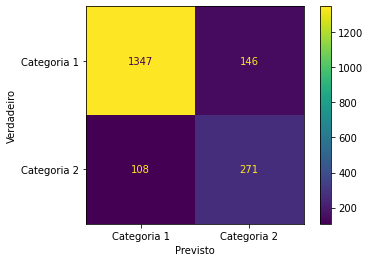

In [ ]:
#Processamento único do algoritmo de redes neurais artificiais

X_train, X_test, y_train, y_test = train_test_split(X_vinhos_p_sub, y_vinhos_sub, test_size = 0.30)

RN = MLPClassifier(activation = 'relu', max_iter = 10000, hidden_layer_sizes= (110, 110), solver = 'adam', random_state=7)
RN.fit(X_train, y_train)
y_pred = RN.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Categoria 1', 'Categoria 2'])
cmd.plot()
cmd.ax_.set(xlabel='Previsto', ylabel='Verdadeiro')